In [2]:
%matplotlib widget
import serial,socket,os,glob
import matplotlib.pyplot as plt
#import atexit
import numpy as np
import pandas as pd
import time, threading,sys,glob
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
from serial import Serial

In [3]:
dirout= 'medidas/'
files = np.sort(glob.glob(dirout+'Dshape_e75_L150_deltaV*'))
aux1 = np.array([filei.split('deltaV')[-1].split('_')[0] for filei in files])
#aux = pd.read_csv(dirout+'Dshape_e75_L150_deltaV1_0',header=None)
#fig,ax = plt.subplots()
#ax.plot(aux.iloc[:,3])

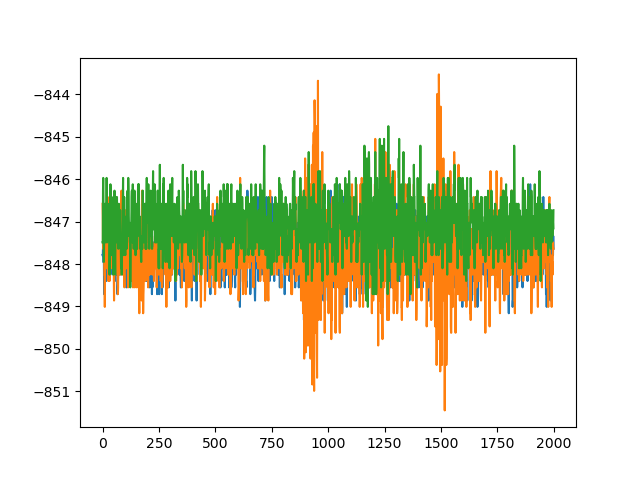

In [49]:
#refs
files_ref = files[aux1=='0']
fig,ax = plt.subplots()
for i,filei in enumerate( files_ref):
    A = pd.read_csv(filei,header=None)
    if i ==0:
        s0 = np.tile(np.zeros_like(A.iloc[:,3]),[len(files_ref),1])
    s0[i] = A.iloc[:,3]
    ax.plot(s0[i])
    

(0.0, 800.0)

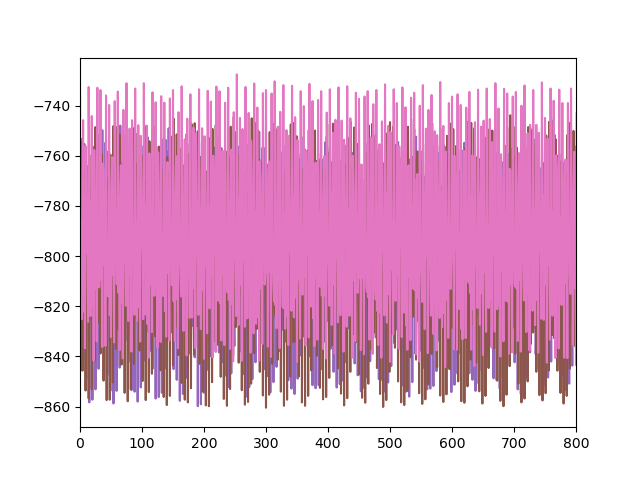

In [52]:
#refs
files_measure = files[aux1!='0']
fig,ax = plt.subplots()
for i,filei in enumerate( files_measure):
    A = pd.read_csv(filei,header=None)
    if i ==0:
        s0 = np.tile(np.zeros_like(A.iloc[:,3]),[len(files_measure),1])
    if len(A.iloc[:,3])<2000:
        s0[i] = np.tile(A.iloc[:,3],[2])
    else:
        s0[i] = A.iloc[:,3]
    ax.plot(s0[i])
ax.set_xlim([0,80*10])

In [42]:
files_measure

array(['medidas/Dshape_e75_L150_deltaV40_0',
       'medidas/Dshape_e75_L150_deltaV40_1',
       'medidas/Dshape_e75_L150_deltaV42_0',
       'medidas/Dshape_e75_L150_deltaV42_1',
       'medidas/Dshape_e75_L150_deltaV44_0',
       'medidas/Dshape_e75_L150_deltaV44_1',
       'medidas/Dshape_e75_L150_deltaV46_0',
       'medidas/Dshape_e75_L150_deltaV46_1',
       'medidas/Dshape_e75_L150_deltaV48_0',
       'medidas/Dshape_e75_L150_deltaV48_1',
       'medidas/Dshape_e75_L150_deltaV50_0',
       'medidas/Dshape_e75_L150_deltaV50_1',
       'medidas/Dshape_e75_L150_deltaV52_0',
       'medidas/Dshape_e75_L150_deltaV52_1',
       'medidas/Dshape_e75_L150_deltaV54_0',
       'medidas/Dshape_e75_L150_deltaV54_1',
       'medidas/Dshape_e75_L150_deltaV56_0',
       'medidas/Dshape_e75_L150_deltaV56_1'], dtype='<U34')

In [44]:
s0[-1].mean(),s0[-2].mean()

(-791.1525399999999, -796.5124000000001)

In [45]:
s0[-3].mean(),s0[-4].mean()

(-796.168305, -795.11195)

In [105]:
rho = 1.2
L = 350e-3
D= 50e-3
Cd = 1

In [118]:
FD= (A.iloc[:,3].mean()-A0.iloc[:,3].mean())

In [120]:
FD*1e-2/(3.54**2*rho/2*L*D)

2.6104430855938916

In [178]:
# calibracion con Cd constante

In [17]:
lista_files = np.sort(glob.glob(dirout+'Dshape_e0_L0_*'))
lista_ref = np.sort(glob.glob(dirout+'refD*'))
A0 = np.zeros((len(lista_ref)))
for i,filei in enumerate(lista_ref):
    aux = pd.read_csv(dirout+'refD_01',header=None)
    A0[i] = aux.iloc[:,3].mean()


In [39]:
tunel_v = pd.read_csv('tunel_viento.csv',header=None)
D,L = [50e-3,350e-3]
rho = 1.2
deltaV, U = tunel_v.to_numpy().T
p1 = np.polyfit(deltaV,U,1)
UdeltaV = np.poly1d(p1)
dvs = np.linspace(10,60,100)

In [40]:
CDi,Ui = np.tile(np.zeros((len(lista_files),1)),[1,2]).T
for i,filei in enumerate(lista_files):
    deltavi = filei.split('deltaV')[1][:2]
    Ui[i] = UdeltaV(float(deltavi))
    #print(Ui)
    A = pd.read_csv(filei,header=None)
    FDi = A.iloc[:,3].mean()-A0.mean()
    CDi[i] = FDi/(Ui[i]**2*L*D*rho/2)

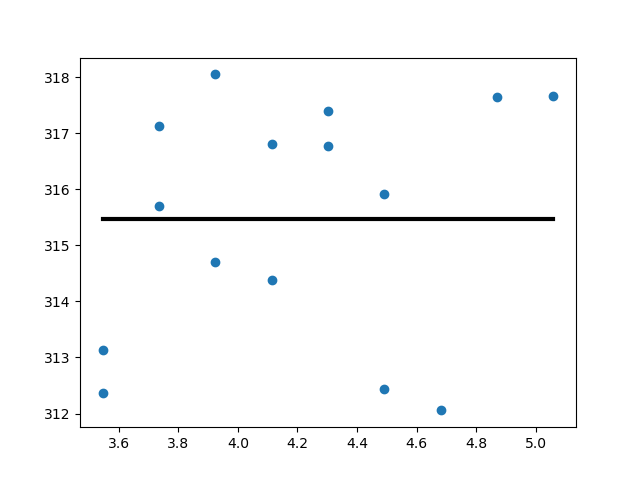

In [41]:
index_in = np.nonzero(np.abs(CDi-CDi.mean())<CDi.std())
CDm = CDi[index_in].mean()
fig,ax = plt.subplots()
ax.plot(Ui[index_in],CDi[index_in],'o')
ax.plot(Ui,Ui*0+CDm,'k',linewidth=3)

In [42]:
escala = 1/CDm

In [44]:
escala*1e3

3.1698069483716846

In [54]:
dirout= 'medidas/'

In [1]:
aux = pd.read_csv(dirout+'Dshape_e75_L150_deltaVtrans_0',header=None)
fig,ax = plt.subplots()
ax.plot(aux.iloc[:,3])

NameError: name 'pd' is not defined

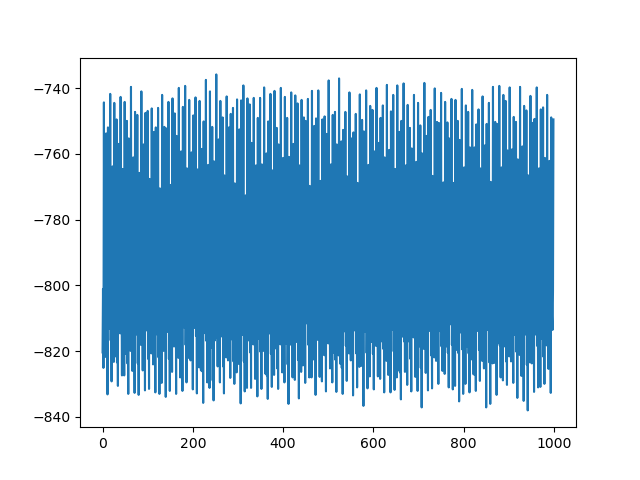

In [59]:
aux = pd.read_csv(dirout+'Dshape_e75_L150_deltaV56_0',header=None)
fig,ax = plt.subplots()
ax.plot(aux.iloc[:,3])

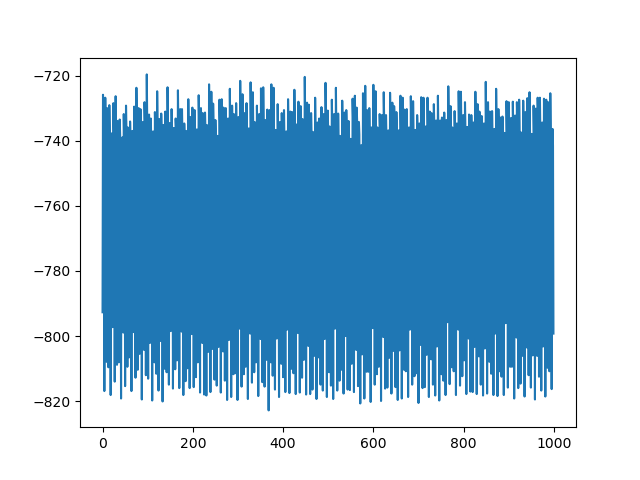

In [60]:
dirout = 'calibra_24_07_2024/'
aux = pd.read_csv(dirout+'Dshape_e0_L0_deltaV56_1',header=None)
fig,ax = plt.subplots()
ax.plot(aux.iloc[:,3])

In [66]:
10/(46/80)

17.39130434782609

In [51]:
125/76

1.644736842105263

In [52]:
0.2*5/50e-3

20.0

In [ ]:
2